<a href="https://colab.research.google.com/github/sviii09/procrastinators/blob/main/Steganography_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python numpy

In [2]:
from google.colab import files

# Upload an image
uploaded = files.upload()

# Get the filename of the uploaded image
image_filename = next(iter(uploaded))
print(f"Uploaded image: {image_filename}")

Saving image_filename.jpg to image_filename.jpg
Uploaded image: image_filename.jpg


Please upload an image file...


Saving image_filename.jpg to image_filename (1).jpg
Uploaded image: image_filename (1).jpg
Data hidden successfully in output_image_filename (1).jpg
Image dimensions: 960x1280
Maximum capacity: 3686400 bits (460800 characters)
Secret message length: 58 characters


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Extracted text:  ?üÀ~8ÀÀüÀü ?Àø  ~À ãÿÇÀð8ã   ü8ÿ üÇø ü ?ãÿÇÿñøÿÿÇãÇü ?üÀ   ñÇp?à~ àp8 qø p? qøp?øàüqÿüø ~ µ[mV«mµUmªÛUVªJÛR¶ªªI+mÛKÿÀ¶ÛmµZ¯ÿÿÿ8ÿà~?ÿÿà~ ýSü~ÿþ¶ÕU¶«mJª¿~8 ø©[R¶Úÿ ü8? øãñÿüqÇàp ÿ8 ø ÿãÿÿü 8ð?   r9#7$qÈãmÉ$mÆäm¹$9#¸ÙÕ%UªÚªª¤ª¶¥m$I:FãHÜnFäqÈãm¶Ûn8ÜmÈÛI$¸ã7$9#mÉm·m·I$I$É Çà ÿð ~8ãÿÇãð8 ÿÿÿÿÿÿÿ ð ~ à~Àà~ 8ãþøãÿÿ8ÀüÀãþü ?ÿÀÿñøàÇãÿÇü ?ð?    ÇÿÿÿñÇÿ?ÿ?ÿð?ÀÿÀþ??ÿÀJÛm©Um¶¥mµZ­µ+Rµ$­¶ªªI+mÛ·ÿÿ¶ÛmIZ   à~8ÿÿÿÿø 8À ÿý\rüÿ ~?¶ÚªJÕRµ+@ü~8ü8üÿI[m¶Úÿ ?ã  p??àp ãÿð8ÿñøãÀãÿøàqø   9¶ä¶äÉ#mÆä¹#r7Hæ5%RJª©+R©[mÛm¶ÅÇ#HÛFÛqÈãm¶Ûr7mÈÛI$7#7$7#HÛm··$m¶Ûm¶Ûm·àqÀÿø qÿ~8 8ãð8ã8ÿÿÿàqÀÿÿÀ  ?üøÿþ ÿ 8ü~?ÿþ8à~8 8 ÿÿÇÿÀÿð ÿ      ÿñøøàøü ? ÿ   àÀüøÿþ ãÿÇ ~qøàqÿüÇÇÿÿ àqøÿÿÿ©+R¶ªª¶«UµZ­I+mªÕj¶ªªI+mØR·ÿÿ¶Ûm¶Ûoÿÿÿÿ?þ8àp?àqÿÀà~8[ràÿ ø¶¥j¶¤¶Ûã8Ç   µZªJÚü ?þ?ñøüqÀ qøÿþ þ?ÿþ ãÀ?qÇ 

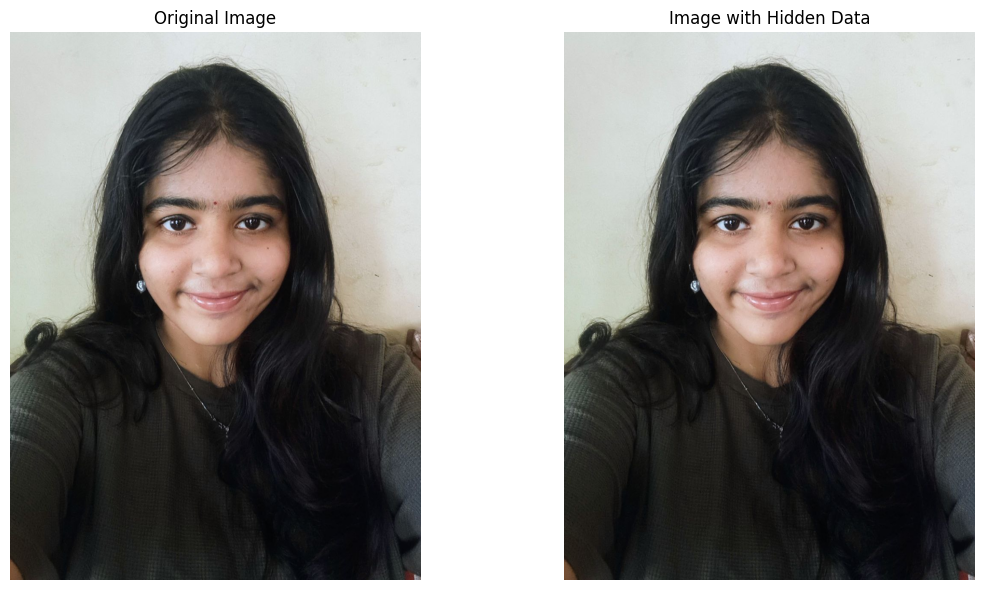

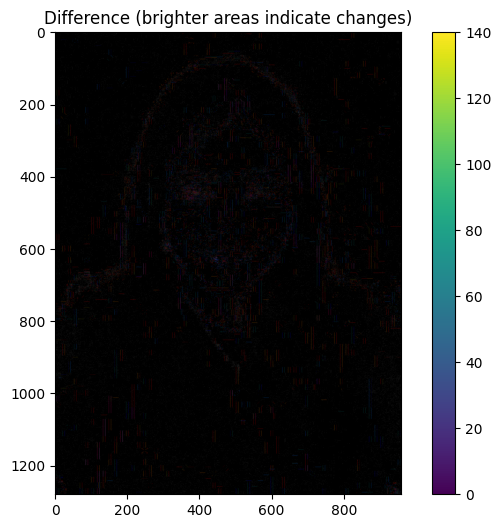

In [ ]:
# Cell 1: Install required packages (though they're usually pre-installed in Colab)
!pip install opencv-python numpy

# Cell 2: Import necessary libraries
import cv2
import numpy as np
import os
from google.colab import files
import matplotlib.pyplot as plt

# Cell 3: Define the Steganography class
class Steganography:
    def __init__(self):
        self.delimiter = "$$END$$"

    def text_to_binary(self, text):
        """Convert text to binary representation"""
        binary = ''.join(format(ord(char), '08b') for char in text)
        # Add delimiter to know where the message ends
        binary += ''.join(format(ord(char), '08b') for char in self.delimiter)
        return binary

    def binary_to_text(self, binary):
        """Convert binary back to text"""
        # Split binary string into 8-bit chunks
        binary_chunks = [binary[i:i+8] for i in range(0, len(binary), 8)]
        # Convert each chunk to a character
        text = ''.join(chr(int(chunk, 2)) for chunk in binary_chunks if len(chunk) == 8)
        # Return text up to the delimiter
        delimiter_index = text.find(self.delimiter)
        if delimiter_index != -1:
            return text[:delimiter_index]
        return text

    def hide_data(self, image_path, secret_text, output_path):
        """Hide secret text in image using OpenCV"""
        # Read the image using OpenCV
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Could not open or find the image: {image_path}")

        # Get dimensions
        height, width, channels = img.shape

        # Convert secret text to binary
        binary_data = self.text_to_binary(secret_text)
        data_length = len(binary_data)

        # Check if the image is large enough to hide the data
        total_pixels = height * width * channels
        if data_length > total_pixels:
            raise ValueError(f"Image not large enough to hide the data. Need {data_length} bits, but image has only {total_pixels} pixels.")

        # Flatten the array for easier manipulation
        img_flat = img.flatten()

        # Modify the least significant bit of each pixel value
        for i in range(data_length):
            img_flat[i] = (img_flat[i] & ~1) | int(binary_data[i])

        # Reshape the array back to original shape
        modified_img = img_flat.reshape(height, width, channels)

        # Save the modified image
        cv2.imwrite(output_path, modified_img)

        return True

    def extract_data(self, image_path):
        """Extract hidden data from image using OpenCV"""
        # Read the image using OpenCV
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Could not open or find the image: {image_path}")

        # Flatten the array
        img_flat = img.flatten()

        # Extract the least significant bit from each pixel
        binary_data = ''.join([str(pixel & 1) for pixel in img_flat])

        # Convert binary data to text
        extracted_text = self.binary_to_text(binary_data)

        return extracted_text

    def hide_data_optimized(self, image_path, secret_text, output_path):
        """Hide data with a more sophisticated approach using multiple channels"""
        # Read the image using OpenCV
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Could not open or find the image: {image_path}")

        # Convert secret text to binary
        binary_data = self.text_to_binary(secret_text)
        data_length = len(binary_data)

        # Get dimensions
        height, width, channels = img.shape
        total_capacity = height * width * channels

        if data_length > total_capacity:
            raise ValueError("Image not large enough to hide the data")

        # Store the length of binary data at the beginning for extraction
        data_length_binary = format(data_length, '032b')  # 32 bits to store length
        binary_data_with_length = data_length_binary + binary_data

        # Counter for traversing through binary data
        data_index = 0

        # Traverse through the image
        for h in range(height):
            for w in range(width):
                for c in range(channels):
                    if data_index < len(binary_data_with_length):
                        # Modify the least significant bit
                        img[h, w, c] = (img[h, w, c] & ~1) | int(binary_data_with_length[data_index])
                        data_index += 1
                    else:
                        # We've hidden all the data
                        break

        # Save the modified image
        cv2.imwrite(output_path, img)
        return True

    def extract_data_optimized(self, image_path):
        """Extract data with the optimized approach"""
        # Read the image using OpenCV
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Could not open or find the image: {image_path}")

        height, width, channels = img.shape

        # First extract the data length (first 32 bits)
        binary_length = ""

        # Counter for binary data
        data_index = 0

        # First extract the length
        for h in range(height):
            for w in range(width):
                for c in range(channels):
                    if data_index < 32:  # First 32 bits contain the length
                        binary_length += str(img[h, w, c] & 1)
                        data_index += 1
                    else:
                        break
                if data_index >= 32:
                    break
            if data_index >= 32:
                break

        # Convert binary length to integer
        data_length = int(binary_length, 2)

        # Now extract the actual data
        binary_data = ""
        data_index = 0
        total_bits_to_read = 32 + data_length  # Length bits + data bits

        for h in range(height):
            for w in range(width):
                for c in range(channels):
                    if data_index < total_bits_to_read:
                        if data_index >= 32:  # Skip the length bits
                            binary_data += str(img[h, w, c] & 1)
                        data_index += 1
                    else:
                        break
                if data_index >= total_bits_to_read:
                    break
            if data_index >= total_bits_to_read:
                break

        # Convert binary data to text
        extracted_text = self.binary_to_text(binary_data)
        return extracted_text

# Cell 4: Upload an image
print("Please upload an image file...")
uploaded = files.upload()

# Get the filename of the uploaded image
image_filename = next(iter(uploaded))
print(f"Uploaded image: {image_filename}")

# Cell 5: Create Steganography instance and hide message
# Create an instance of the Steganography class
steg = Steganography()

# Define your secret message
secret_message = "This is a secret message that will be hidden in the image!"

# Define output filename
output_filename = "output_" + image_filename

# Hide the data in the image (using the optimized method)
try:
    steg.hide_data_optimized(image_filename, secret_message, output_filename)
    print(f"Data hidden successfully in {output_filename}")

    # Calculate maximum capacity
    img = cv2.imread(image_filename)
    height, width, channels = img.shape
    max_bits = height * width * channels
    max_chars = max_bits // 8

    print(f"Image dimensions: {width}x{height}")
    print(f"Maximum capacity: {max_bits} bits ({max_chars} characters)")
    print(f"Secret message length: {len(secret_message)} characters")
except Exception as e:
    print(f"Error: {e}")

# Cell 6: Download the output image
files.download(output_filename)

# Cell 7: Extract and verify the hidden message
try:
    extracted_text = steg.extract_data_optimized(output_filename)
    print(f"Extracted text: {extracted_text}")

    # Verify if the extraction was successful
    if extracted_text == secret_message:
        print("Success! The extracted text matches the original message.")
    else:
        print("Warning: The extracted text does not match the original message.")
except Exception as e:
    print(f"Error extracting data: {e}")

# Cell 8: Visualize the original and modified images
# Read images
original = cv2.imread(image_filename)
modified = cv2.imread(output_filename)

# Convert from BGR to RGB (for proper display)
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
modified_rgb = cv2.cvtColor(modified, cv2.COLOR_BGR2RGB)

# Display images side by side
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(original_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(modified_rgb)
plt.title('Image with Hidden Data')
plt.axis('off')

plt.tight_layout()
plt.show()

# Cell 9: Visualize the difference to see where changes occurred
diff = cv2.absdiff(original, modified)

# Increase contrast to make changes more visible
diff_amplified = diff * 20

plt.figure(figsize=(8, 6))
plt.imshow(diff_amplified)
plt.title('Difference (brighter areas indicate changes)')
plt.colorbar()
plt.show()

# Optional Cell 10: Try with a custom message
custom_message = input("Enter a custom message to hide (or press Enter to skip): ")

if custom_message:
    custom_output = "custom_" + image_filename

    try:
        steg.hide_data_optimized(image_filename, custom_message, custom_output)
        print(f"Custom message hidden in {custom_output}")
        files.download(custom_output)

        # Extract and verify
        extracted_custom = steg.extract_data_optimized(custom_output)
        print(f"Extracted custom message: {extracted_custom}")
    except Exception as e:
        print(f"Error with custom message: {e}")